IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


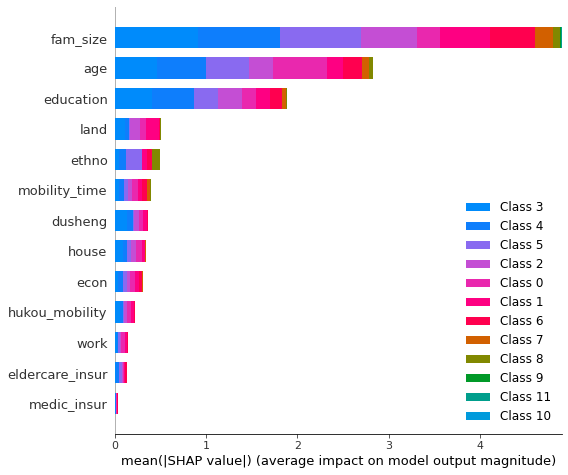

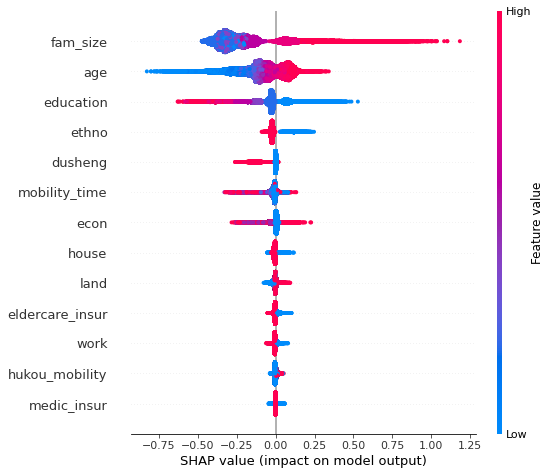

{'model_features': {'name': ['fam_size', 'house', 'econ', 'age', 'ethno', 'hukou_mobility', 'mobility_time', 'land', 'education', 'work', 'eldercare_insur', 'medic_insur', 'dusheng'], 'data': [0.3330000042915344, 0.052000001072883606, 0.017000000923871994, 0.12399999797344208, 0.023000000044703484, 0.03999999910593033, 0.023000000044703484, 0.09600000083446503, 0.14399999380111694, 0.020999999716877937, 0.013000000268220901, 0.010999999940395355, 0.10199999809265137]}, 'models_param': {'name': ['训练用时', '数据切分', '数据洗牌', '交叉验证', '基学习器', '基学习器数量', '学习率', 'L1正则项', 'L2正则项', '样本征采样率', '树特征采样率', '节点特征采样率', '叶子节点中样本的最小权重', '树的最大深度'], 'data': ['18.142s', 0.75, '否', '否', 'gbtree', 100, 0.1, 0, 1, 1, 1, 1, 0, 'None']}, 'evaluation_indicators': {'index': ['训练集', '测试集'], 'title': ['准确率', '召回率', '精确率', 'F1', 'AUC'], 'data': [[0.677, 0.677, 0.665, 0.646, 0.969], [0.668, 0.668, 0.65, 0.636, 0.967]]}, 'train_roc_curve': {'data': [{'dataframe':              fpr       tpr
0       0.000000  0.000000
1     

In [1]:
import numpy
import pandas
import shap
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("1%人口抽样调查数据.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_classifier(data_x=data_x, data_y=data_y)
# SHAP分析
explainer = shap.TreeExplainer(result['model'])  # 假设模型存储在result的'model'键中
shap_values = explainer.shap_values(data_x)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns)
mean_shap_values = numpy.mean(shap_values, axis=0)
shap.summary_plot(mean_shap_values, data_x, feature_names=data_x.columns)
print(result)